In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from pathlib import Path

In [2]:
companies = pd.read_csv('./merged/new_companies.csv')
products = pd.read_csv('./merged/new_products.csv')

relationships_people = pd.read_csv('./merged/new_relationships_people.csv')
funding_rounds = pd.read_csv('./merged/new_funding_rounds.csv')
acquisitions = pd.read_csv('./merged/new_acquisitions.csv')
investments_funds = pd.read_csv('./merged/new_investments_funds.csv')
ipos = pd.read_csv('./merged/new_ipos.csv')

In [3]:
# make categories in the files

acquisitions['term_code'] = acquisitions['term_code'].astype('category')
acquisitions['price_currency_code'] = acquisitions['price_currency_code'].astype('category')

funding_rounds['funded_at'] = pd.to_datetime(funding_rounds['funded_at'])
funding_rounds['funding_round_type'] = funding_rounds['funding_round_type'].astype('category')
funding_rounds['funding_round_code'] = funding_rounds['funding_round_code'].astype('category')
funding_rounds['is_first_round'] = funding_rounds['is_first_round'].astype('category')
funding_rounds['is_last_round'] = funding_rounds['is_last_round'].astype('category')

# Modify 'funding_round_type' to reflect lower investment stage
condition1 = (funding_rounds['funding_round_code'] == 'angel') & (funding_rounds['funding_round_type'] == 'series-non_zero_IPO')
condition2 = (funding_rounds['funding_round_code'] == 'seed') & (funding_rounds['funding_round_type'] == 'series-non_zero_IPO')

funding_rounds.loc[condition1, 'funding_round_type'] = 'angel'
if 'seed' not in funding_rounds['funding_round_type'].cat.categories:
    funding_rounds['funding_round_type'] = funding_rounds['funding_round_type'].cat.add_categories(['seed'])

# assign 'seed' to the column
funding_rounds.loc[condition2, 'funding_round_type'] = 'seed'

investments_funds['funded_at'] = pd.to_datetime(investments_funds['funded_at'])
investments_funds['raised_currency_code'] = investments_funds['raised_currency_code'].astype('category')

ipos['public_at'] = pd.to_datetime(ipos['public_at'])
ipos['valuation_currency_code'] = ipos['valuation_currency_code'].astype('category')
ipos['raised_currency_code'] = ipos['raised_currency_code'].astype('category')

companies['founded_at'] = pd.to_datetime(companies['founded_at'], errors='coerce')
companies['closed_at'] = pd.to_datetime(companies['closed_at'], errors='coerce')
companies['last_investment_at'] = pd.to_datetime(companies['last_investment_at'], errors='coerce')
companies['last_funding_at'] = pd.to_datetime(companies['last_funding_at'], errors='coerce')
companies['first_investment_at'] = pd.to_datetime(companies['first_investment_at'], errors='coerce')
companies['first_funding_at'] = pd.to_datetime(companies['first_funding_at'], errors='coerce')

companies['country_code'] = companies['country_code'].astype('category')
companies['investment_rounds'] = companies['investment_rounds'].astype('int')
companies['invested_companies'] = companies['invested_companies'].astype('int')
companies['funding_rounds'] = companies['funding_rounds'].astype('int')
companies['funding_total_usd'] = companies['funding_total_usd'].astype('int')

relationships_people['start_at'] = pd.to_datetime(relationships_people['start_at'], errors='coerce')
relationships_people['end_at'] = pd.to_datetime(relationships_people['end_at'], errors='coerce')
relationships_people['is_past'] = relationships_people['is_past'].astype('category')


In [4]:
companies = pd.merge(companies, ipos, left_on="id", right_on="object_id", how="left")
companies

,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,office_count,closed_office_count,operating_office_count,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,2.0,0,2.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN


aggregate rounds to have 9 more columns that are sums of how much the company raised with different funding models:

In [5]:
rounds = pd.merge(companies, funding_rounds, left_on="id", right_on="object_id", how="left")
aggregation = {
    'angel': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'angel'].sum()),
    'crowdfunding': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'crowdfunding'].sum()),
    'other': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'other'].sum()),
    'post_ipo': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'post-ipo'].sum()),
    'private_equity': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'private_equity'].sum()),
    'series_a': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'series-non_zero_IPO'].sum()),
    'series_b': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'series-relative_frequency_table'].sum()),
    'series_c': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'series-c+'].sum()),
    'venture': ('raised_amount_usd', lambda x: x[rounds['funding_round_type'] == 'venture'].sum())
}

rounds = rounds.groupby('id').agg(**aggregation).reset_index()
companies = pd.merge(companies, rounds, on="id", how="left")
companies


,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,stock_symbol,angel,crowdfunding,other,post_ipo,private_equity,series_a,series_b,series_c,venture
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0,0.0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,NaN,750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
companies['angel'] = companies['angel'].astype('int')
companies['crowdfunding'] = companies['crowdfunding'].astype('int')
companies['other'] = companies['other'].astype('int')
companies['post_ipo'] = companies['post_ipo'].astype('int')
companies['private_equity'] = companies['private_equity'].astype('int')
companies['series_a'] = companies['series_a'].astype('int')
companies['series_b'] = companies['series_b'].astype('int')
companies['series_c'] = companies['series_c'].astype('int')
companies['venture'] = companies['venture'].astype('int')
companies

,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,stock_symbol,angel,crowdfunding,other,post_ipo,private_equity,series_a,series_b,series_c,venture
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,25000000,0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,NaN,750000,0,0,0,0,0,0,0,0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,NaN,0,0,0,0,0,0,0,0,0


show how many companies have this company acquired and if it has been acquired themselves

In [7]:
# columns_to_drop = ['acquiring_object_id_x', 'number_of_acq_companies_x', 'acquired_object_id_x','have_been_acquired_x', 'acquiring_object_id_y', 'number_of_acq_companies_y', 'acquiring_object_id','number_of_acq_companies', 'acquired_object_id_y', 'have_been_acquired_y']
# companies.drop(columns_to_drop, axis=1, inplace=True)
companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       196554 non-null  object        
 1   entity_type              196554 non-null  object        
 2   name                     196553 non-null  object        
 3   category_code            123187 non-null  object        
 4   status                   196554 non-null  object        
 5   founded_at               91228 non-null   datetime64[ns]
 6   closed_at                2620 non-null    datetime64[ns]
 7   domain                   196554 non-null  int64         
 8   homepage_url             196554 non-null  int64         
 9   twitter_username         196554 non-null  int64         
 10  short_description        196554 non-null  int64         
 11  description              196554 non-null  int64         
 12  overview        

In [8]:
# Group by 'acquiring_object_id' and count acquisitions
acquisitions_count = acquisitions.groupby('acquiring_object_id').size().reset_index(name='number_of_acq_companies')

# Merge with companies DataFrame
companies = pd.merge(companies, acquisitions_count, left_on='id', right_on='acquiring_object_id', how='left')
companies['number_of_acq_companies'].fillna(0, inplace=True)

# Group by 'acquired_object_id' and add 'have_been_acquired' indicator
t = acquisitions.assign(have_been_acquired=1)
t = t[['acquired_object_id', 'have_been_acquired']].drop_duplicates()

# Merge with companies DataFrame
companies = pd.merge(companies, t, left_on='id', right_on='acquired_object_id', how='left')
companies['have_been_acquired'].fillna(0, inplace=True)
companies


,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,post_ipo,private_equity,series_a,series_b,series_c,venture,acquiring_object_id,number_of_acq_companies,acquired_object_id,have_been_acquired
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,0,0,0,0,25000000,0,NaN,0.0,NaN,0.0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,c:10,1.0
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,c:100,1.0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,0,0,0,0,0,0,c:9996,5.0,NaN,0.0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [9]:
companies['number_of_acq_companies'] = companies['number_of_acq_companies'].astype('int')
companies['have_been_acquired'] = companies['have_been_acquired'].astype('int')
companies

,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,post_ipo,private_equity,series_a,series_b,series_c,venture,acquiring_object_id,number_of_acq_companies,acquired_object_id,have_been_acquired
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,0,0,0,0,25000000,0,NaN,0,NaN,0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,c:10,1
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,c:100,1
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,NaN,0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,NaN,0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,NaN,0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,0,0,0,0,0,0,c:9996,5,NaN,0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,0,0,0,0,0,0,NaN,0,NaN,0


In [10]:
# Merge investments with FINANCIAL_ORG and summarize
financial_org = pd.read_csv('./merged/new_financial_org.csv')

t = pd.merge(investments_funds, financial_org, left_on='investor_object_id', right_on='id')
t = t.groupby('funded_object_id').size().reset_index(name='num_of_fin_org_financed')
t['fin_org_financed'] = 1

# Merge with companies DataFrame
companies = pd.merge(companies, t, left_on='id', right_on='funded_object_id', how='left', suffixes=('', '_y'))
companies['fin_org_financed'].fillna(0, inplace=True)
companies


,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,series_b,series_c,venture,acquiring_object_id,number_of_acq_companies,acquired_object_id,have_been_acquired,funded_object_id,num_of_fin_org_financed,fin_org_financed
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,0,25000000,0,NaN,0,NaN,0,c:1,23.0,1.0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,NaN,0,c:10,1,NaN,NaN,0.0
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,0,0,0,NaN,0,c:100,1,NaN,NaN,0.0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,0,0,0,NaN,0,NaN,0,NaN,NaN,0.0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,0,0,0,NaN,0,NaN,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,0,0,0,NaN,0,NaN,0,NaN,NaN,0.0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,0,0,0,NaN,0,NaN,0,NaN,NaN,0.0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,0,0,0,c:9996,5,NaN,0,NaN,NaN,0.0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,0,0,0,NaN,0,NaN,0,NaN,NaN,0.0


In [11]:
person = pd.read_csv('./merged/new_people_from_obj.csv')

# Repeat the process for Person and companies DataFrames
# Merge investments with Person and summarize
t = pd.merge(investments_funds, person, left_on='investor_object_id', right_on='id')
t = t.groupby('funded_object_id').size().reset_index(name='num_of_person_financed')
t['person_financed'] = 1

# Merge with companies DataFrame
companies = pd.merge(companies, t, left_on='id', right_on='funded_object_id', how='left')
companies['person_financed'].fillna
companies

,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,acquiring_object_id,number_of_acq_companies,acquired_object_id,have_been_acquired,funded_object_id_x,num_of_fin_org_financed,fin_org_financed,funded_object_id_y,num_of_person_financed,person_financed
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,NaN,0,NaN,0,c:1,23.0,1.0,NaN,NaN,NaN
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0,c:10,1,NaN,NaN,0.0,NaN,NaN,NaN
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,NaN,0,c:100,1,NaN,NaN,0.0,NaN,NaN,NaN
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,NaN,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,NaN,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,NaN,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,NaN,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,c:9996,5,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,NaN,0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN


In [12]:
# Merge investments with companies and summarize
t = pd.merge(investments_funds, companies, left_on='funded_object_id', right_on='id')
t = t.groupby('funded_object_id').size().reset_index(name='num_of_companies_financed')
t['startup_financed'] = 1

# Merge with companies DataFrame
companies = pd.merge(companies, t, left_on='id', right_on='funded_object_id', how='left', suffixes=('', '_y'))
companies['startup_financed'].fillna(0, inplace=True)
companies


,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,have_been_acquired,funded_object_id_x,num_of_fin_org_financed,fin_org_financed,funded_object_id_y,num_of_person_financed,person_financed,funded_object_id,num_of_companies_financed,startup_financed
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaT,1,1,1,...,0,c:1,23.0,1.0,NaN,NaN,NaN,c:1,23.0,1.0
1,c:10,Company,Flektor,games_video,acquired,NaT,NaT,1,1,1,...,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,c:100,Company,There,games_video,acquired,NaT,NaT,1,1,1,...,1,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaT,1,1,1,...,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [13]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         196554 non-null  object        
 1   entity_type                196554 non-null  object        
 2   name                       196553 non-null  object        
 3   category_code              123187 non-null  object        
 4   status                     196554 non-null  object        
 5   founded_at                 91228 non-null   datetime64[ns]
 6   closed_at                  2620 non-null    datetime64[ns]
 7   domain                     196554 non-null  int64         
 8   homepage_url               196554 non-null  int64         
 9   twitter_username           196554 non-null  int64         
 10  short_description          196554 non-null  int64         
 11  description                196554 non-null  int64   

In [14]:
# # Dropping specific columns
# columns_to_drop = ['object_id', 'acquiring_object_id', 'acquired_object_id', 
#                    'stock_symbol', 'funded_object_id_x', 'funded_object_id_y', 'funded_object_id', 'entity_type']
# companies.drop(columns_to_drop, axis=1, inplace=True)
# # Remove duplicates
# companies.drop_duplicates(inplace=True)
# columns_to_drop = ['num_of_companies_financed', 'startup_financed', 'funded_object_id']
# companies.drop(columns_to_drop, axis=1, inplace=True)

In [100]:
# Convert certain columns to categorical type
companies['domain'] = companies['domain'].astype('category')
companies['homepage_url'] = companies['homepage_url'].astype('category')
companies['twitter_username'] = companies['twitter_username'].astype('category')
companies['short_description'] = companies['short_description'].astype('category')
companies['description'] = companies['description'].astype('category')
companies['overview'] = companies['overview'].astype('category')

companies['category_code'] = companies['category_code'].astype('category')
companies['status'] = companies['status'].astype('category')
companies['region'] = companies['region'].astype('category')
companies['country_code'] = companies['country_code'].astype('category')
companies['fin_org_financed'] = companies['fin_org_financed'].astype('int')
companies['person_financed'] = companies['person_financed'].astype('int')
companies['product_count'] = companies['product_count'].astype('int')
companies['closed_product_count'] = companies['closed_product_count'].astype('int')
companies['operating_product_count'] = companies['operating_product_count'].astype('int')
companies['office_count'] = companies['office_count'].astype('int')
companies['operating_office_count'] = companies['operating_office_count'].astype('int')
# companies['valuation_amount'] = companies['valuation_amount'].astype('int')
# companies['raised_amount'] = companies['raised_amount'].astype('int')
# companies['num_of_fin_org_financed'] = companies['num_of_fin_org_financed'].astype('int')
# companies['fin_org_financed'] = companies['fin_org_financed'].astype('int')
# companies['num_of_person_financed'] = companies['num_of_person_financed'].astype('int')
# companies['person_financed'] = companies['person_financed'].astype('int')
# companies['num_of_companies_financed'] = companies['num_of_companies_financed'].astype('int')
# companies['startup_financed'] = companies['startup_financed'].astype('int')

In [16]:
companies.to_csv('./merged/new_merged_companies.csv', index=False)

In [17]:
filtered_companies = companies[companies['category_code'] != ""]

# Grouping by 'category_code' and calculating summary statistics
status = filtered_companies.groupby('category_code').agg(
    n_acquired=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'acquired').sum()),
    n_closed=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'closed').sum()),
    n_ipo=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'ipo').sum()),
    n_ipo_acquired=pd.NamedAgg(column='status', aggfunc=lambda x: ((x == 'ipo') | (x == 'acquired')).sum()),
    n_operating=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'operating').sum()),
    n=pd.NamedAgg(column='status', aggfunc='size')
).reset_index()

# Calculating rates
status['acquired_rate'] = status['n_acquired'] / status['n']
status['closed_rate'] = status['n_closed'] / status['n']
status['ipo_rate'] = status['n_ipo'] / status['n']
status['ipo_acquired_rate'] = status['n_ipo_acquired'] / status['n']
status['operating_rate'] = status['n_operating'] / status['n']

status.sort_values(by='ipo_rate', ascending=False, inplace=True)


/var/folders/6g/_ldjv_pd0k36jp2tc2jnbcl00000gn/T/ipykernel_51559/1457940302.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status = filtered_companies.groupby('category_code').agg(


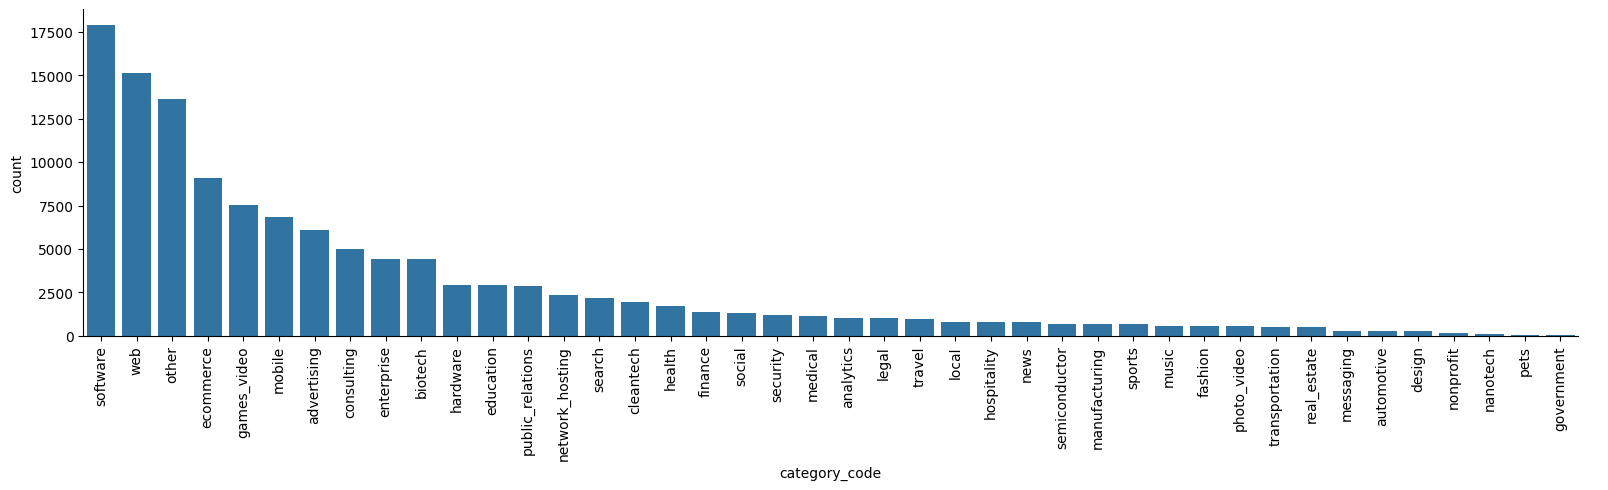

In [18]:
companies['category_code'].value_counts()
# barplot with companies categories
p = sns.catplot(
    data = companies.sort_values('category_code'),
    x = 'category_code',
    kind = 'count',
    order = companies['category_code'].value_counts().index,
    height = 4,
    aspect = 4,
    color = 'tab:blue'
    # palette = 'Blues'
)
for item in p.ax.get_xticklabels():
    item.set_rotation(90)




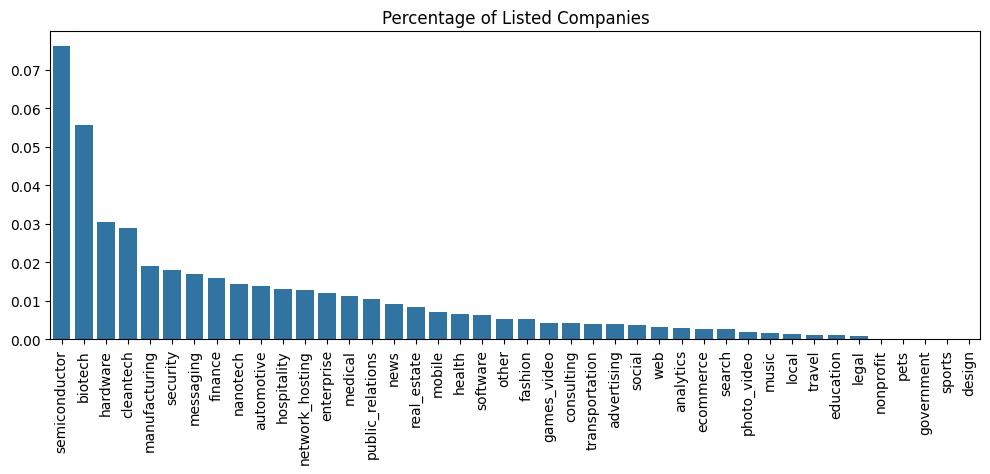

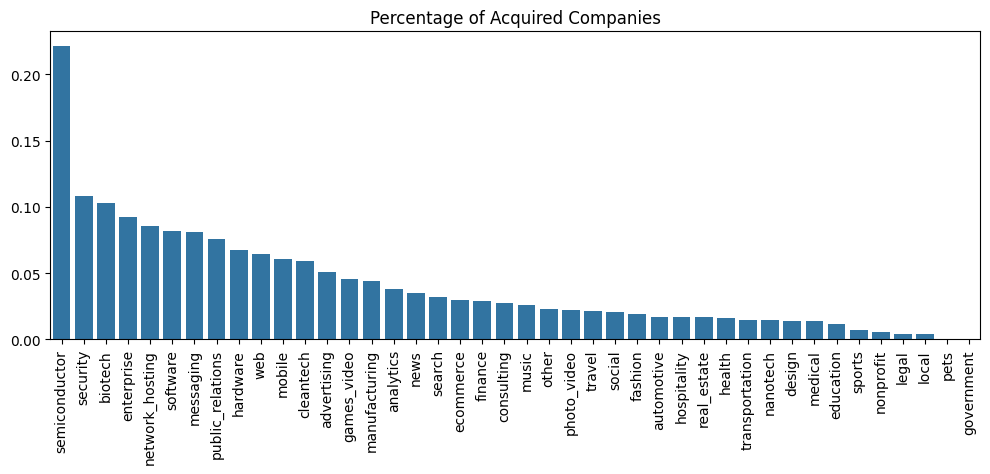

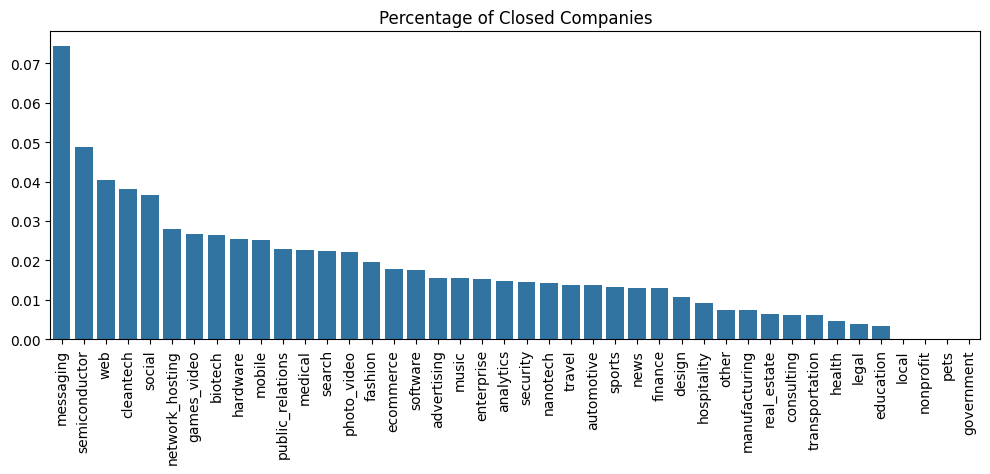

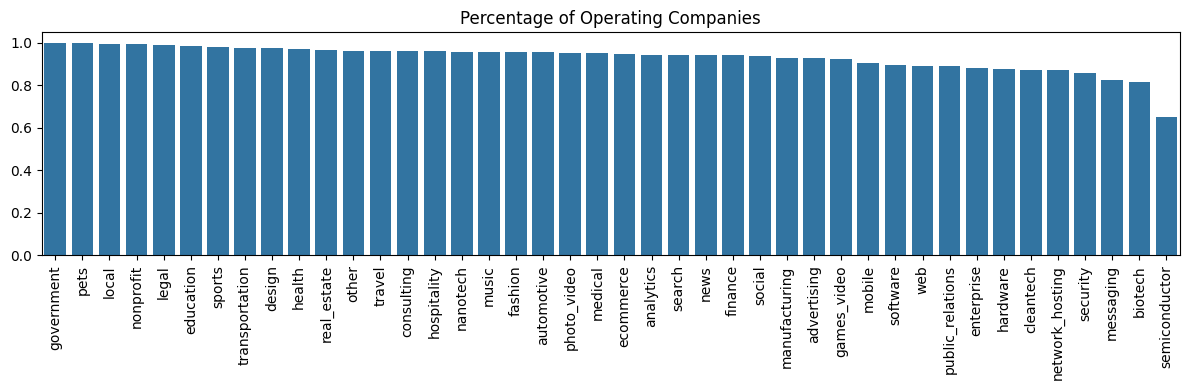

In [19]:
# Sorting dataframes
ipo_sorted = status.sort_values(by='ipo_rate', ascending=False)
acquired_sorted = status.sort_values(by='acquired_rate', ascending=False)
closed_sorted = status.sort_values(by='closed_rate', ascending=False)
operating_sorted = status.sort_values(by='operating_rate', ascending=False)

# Function to create non_zero_IPO bar plot
def create_bar_plot(df, y_col, title):
    plt.figure(figsize=(12, 4))
    sns.barplot(x='category_code', y=y_col, data=df, order=df['category_code'])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title)
    plt.xticks(rotation=90)

# Create and display each plot
create_bar_plot(ipo_sorted, 'ipo_rate', 'Percentage of Listed Companies')
create_bar_plot(acquired_sorted, 'acquired_rate', 'Percentage of Acquired Companies')
create_bar_plot(closed_sorted, 'closed_rate', 'Percentage of Closed Companies')
create_bar_plot(operating_sorted, 'operating_rate', 'Percentage of Operating Companies')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Top 10 countries')]

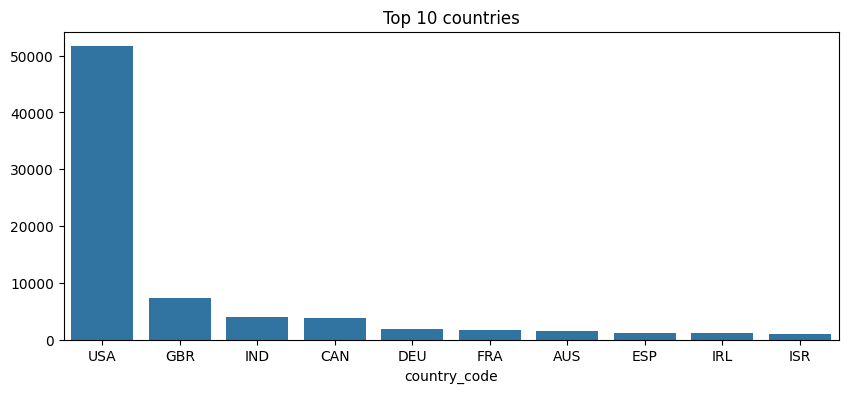

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(
    x=companies['country_code'].value_counts().index[0:10],
    y=companies['country_code'].value_counts().values[0:10],
    order=companies['country_code'].value_counts().index[0:10],
    color = 'tab:blue',

).set(title='Top 10 countries')

In [21]:

# Assuming companies is non_zero_IPO pandas DataFrame

# Group by 'country_code' and calculate summary statistics
teritory = companies.groupby('country_code').agg(
    n=pd.NamedAgg(column='status', aggfunc='size'),
    n_ipo=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'ipo').sum()),
    n_operating=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'operating').sum()),
    n_closed=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'closed').sum()),
    n_acquired=pd.NamedAgg(column='status', aggfunc=lambda x: (x == 'acquired').sum())
).reset_index()

# Calculate rates
teritory['ipo_rate'] = teritory['n_ipo'] / teritory['n'] * 100
teritory['acquired_rate'] = teritory['n_acquired'] / teritory['n'] * 100
teritory['closed_rate'] = teritory['n_closed'] / teritory['n'] * 100
teritory['operating_rate'] = teritory['n_operating'] / teritory['n'] * 100

# Sort by 'n' in descending order and filter out empty 'country_code'
teritory = teritory[teritory['country_code'] != ""].sort_values(by='n', ascending=False)
teritory

/var/folders/6g/_ldjv_pd0k36jp2tc2jnbcl00000gn/T/ipykernel_51559/3390533921.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  teritory = companies.groupby('country_code').agg(


,country_code,n,n_ipo,n_operating,n_closed,n_acquired,ipo_rate,acquired_rate,closed_rate,operating_rate
164,USA,51638,922,44388,1354,4974,1.785507,9.632441,2.622100,85.959952
56,GBR,7372,19,6752,159,442,0.257732,5.995659,2.156810,91.589799
72,IND,3924,5,3844,28,47,0.127421,1.197757,0.713558,97.961264
30,CAN,3728,33,3382,70,243,0.885193,6.518240,1.877682,90.718884
43,DEU,1921,6,1748,45,122,0.312337,6.350859,2.342530,90.994274
...,...,...,...,...,...,...,...,...,...,...
137,RWA,1,0,1,0,0,0.000000,0.000000,0.000000,100.000000
39,CUB,1,0,1,0,0,0.000000,0.000000,0.000000,100.000000
139,SDN,1,0,1,0,0,0.000000,0.000000,0.000000,100.000000
145,SOM,1,0,0,1,0,0.000000,0.000000,100.000000,0.000000


count    175.000
mean       0.149
std        0.517
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        4.098
Name: ipo_rate, dtype: float64


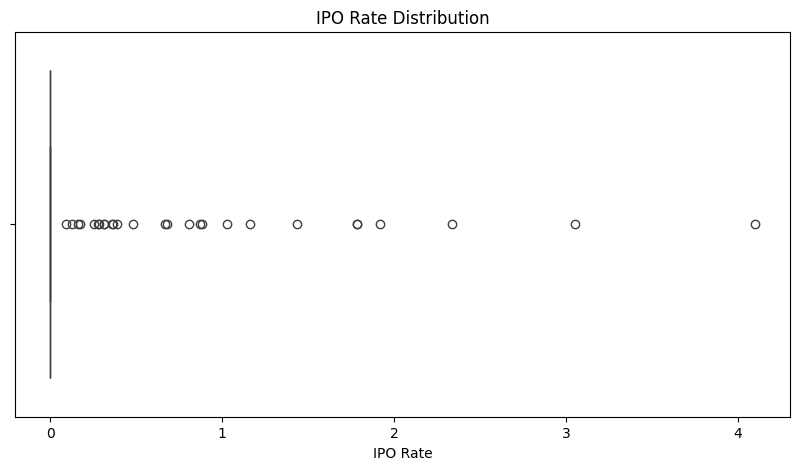

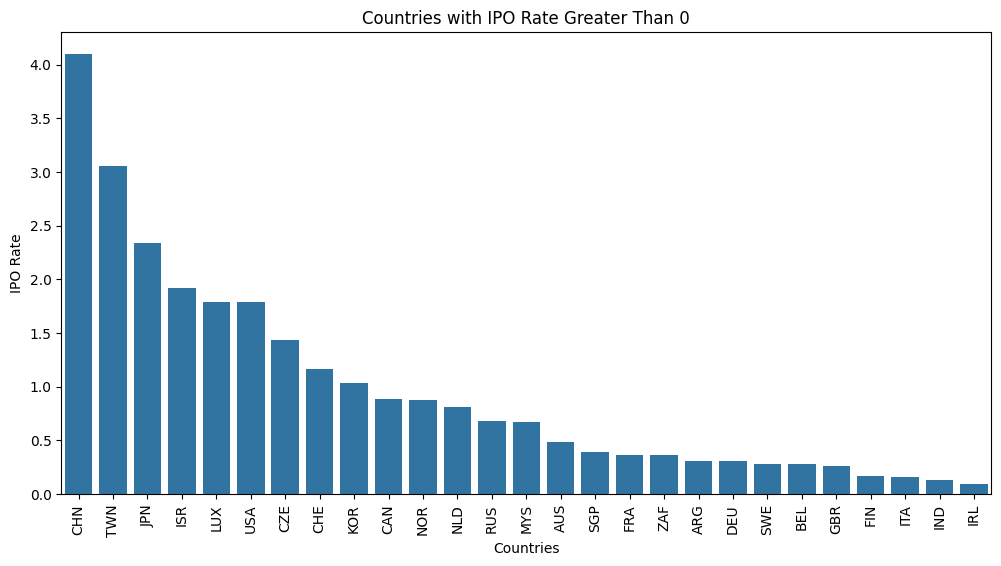

In [22]:
# Round the summary of IPO rates
ipo_rate_summary = round(teritory['ipo_rate'].describe(), 3)
print(ipo_rate_summary)

# Find the minimum non-zero IPO rate
min_ipo_rate = teritory[teritory['ipo_rate'] != 0]['ipo_rate'].min()

# Boxplot for IPO rate distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='ipo_rate', data=teritory)
plt.title("IPO Rate Distribution")
plt.xlabel("IPO Rate")
plt.show()

# Filter for non-zero IPO rates and order countries by IPO rate
non_zero_IPO = teritory[teritory['ipo_rate'] != 0]
non_zero_IPO = non_zero_IPO.sort_values('ipo_rate', ascending=False)

# Bar plot for IPO rates by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country_code', y='ipo_rate', data=non_zero_IPO, order=non_zero_IPO['country_code'])
plt.xlabel("Countries")
plt.ylabel("IPO Rate")
plt.title("Countries with IPO Rate Greater Than 0")
plt.xticks(rotation=90)
plt.show()



count     148.0000
mean       46.4324
std       117.9565
min         1.0000
25%         2.0000
50%         7.0000
75%        33.7500
max      1100.0000
Name: n, dtype: float64


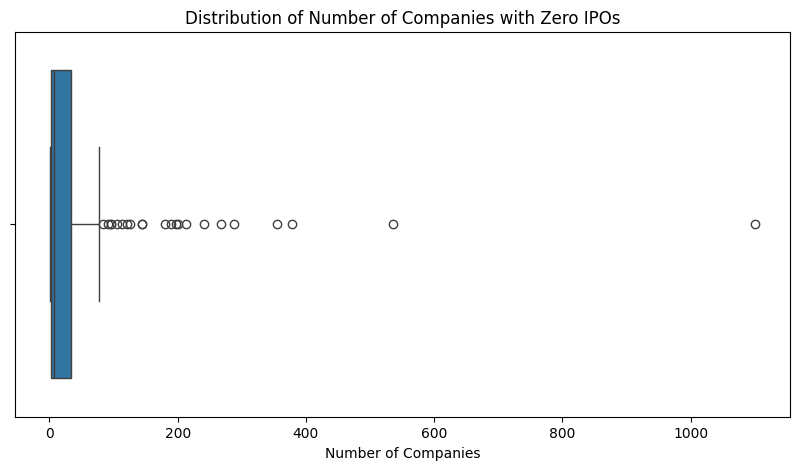

In [23]:
# Round the summary of 'n' where 'n_ipo' equals 0
teritory_summary = round(teritory[teritory['n_ipo'] == 0]['n'].describe(), 4)
print(teritory_summary)

# Filter 'teritory' for 'n_ipo' equal to 0 and plot the boxplot for 'n'
plt.figure(figsize=(10, 5))
sns.boxplot(x='n', data=teritory[teritory['n_ipo'] == 0])
plt.xlabel("Number of Companies")
plt.title("Distribution of Number of Companies with Zero IPOs")
plt.show()


In [24]:
n_non_zero_ipo = teritory[(teritory['n_ipo'] == 0) & (teritory['n'] > 100)].sort_values(by='n', ascending=False)
n_non_zero_ipo

,country_code,n,n_ipo,n_operating,n_closed,n_acquired,ipo_rate,acquired_rate,closed_rate,operating_rate
50,ESP,1100,0,1040,26,34,0.0,3.090909,2.363636,94.545455
26,BRA,536,0,501,13,22,0.0,4.104478,2.425373,93.470149
45,DNK,379,0,339,13,27,0.0,7.124011,3.430079,89.445910
157,TUR,355,0,351,1,3,0.0,0.845070,0.281690,98.873239
127,POL,288,0,281,2,5,0.0,1.736111,0.694444,97.569444
65,HKG,267,0,253,9,5,0.0,1.872659,3.370787,94.756554
12,AUT,241,0,219,7,15,0.0,6.224066,2.904564,90.871369
120,NZL,213,0,199,7,7,0.0,3.286385,3.286385,93.427230
130,PRT,200,0,194,1,5,0.0,2.500000,0.500000,97.000000
161,UKR,198,0,198,0,0,0.0,0.000000,0.000000,100.000000


     country_code     status
0             ESP  operating
1             ESP  operating
2             ESP  operating
3             ESP  operating
4             ESP  operating
...           ...        ...
4896          EST  operating
4897          EST  operating
4898          EST     closed
4899          EST     closed
4900          EST     closed

[4901 rows x 2 columns]


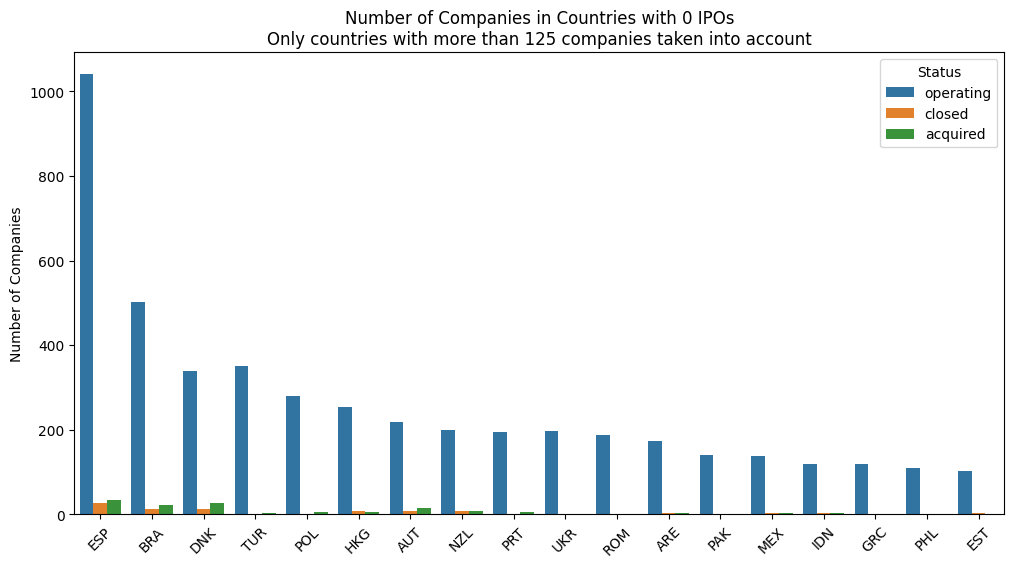

In [25]:
country_codes = []
statuses = []

# Populate the lists based on the counts in each row
for index, row in n_non_zero_ipo.iterrows():
    country_codes.extend([row['country_code']] * row['n_operating'])
    statuses.extend(['operating'] * row['n_operating'])
    country_codes.extend([row['country_code']] * row['n_closed'])
    statuses.extend(['closed'] * row['n_closed'])
    country_codes.extend([row['country_code']] * row['n_acquired'])
    statuses.extend(['acquired'] * row['n_acquired'])

# Create frequency_table DataFrame from the lists
data = pd.DataFrame({"country_code": country_codes, "status": statuses})

# Sort by frequency of country code
country_order = data['country_code'].value_counts().index
data['country_code'] = pd.Categorical(data['country_code'], categories=country_order)

# Display the DataFrame (optional)
print(data)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create frequency_table bar plot
sns.countplot(data=data, x='country_code', hue='status', order=country_order)
plt.title("Number of Companies in Countries with 0 IPOs\nOnly countries with more than 125 companies taken into account")
plt.xlabel('')
plt.ylabel('Number of Companies')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

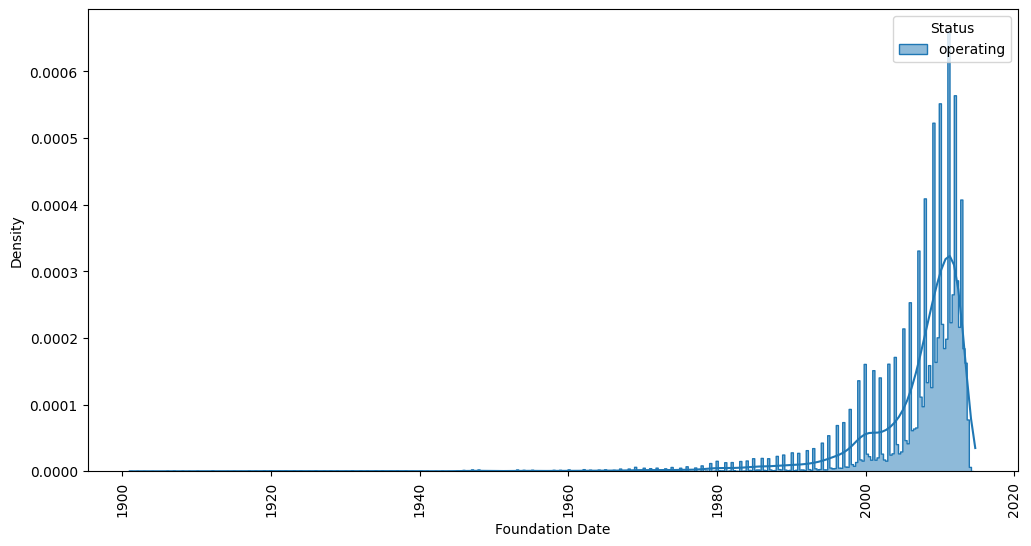

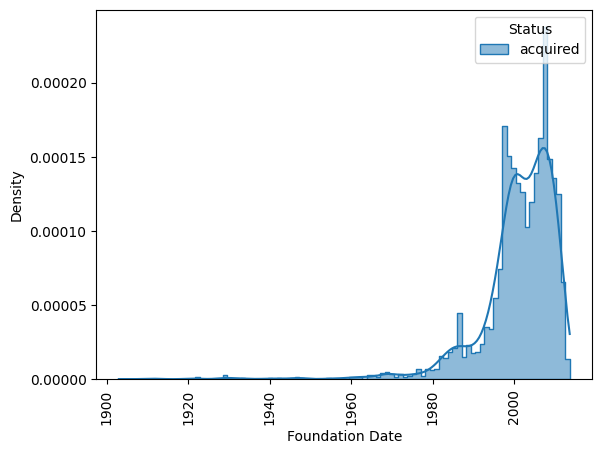

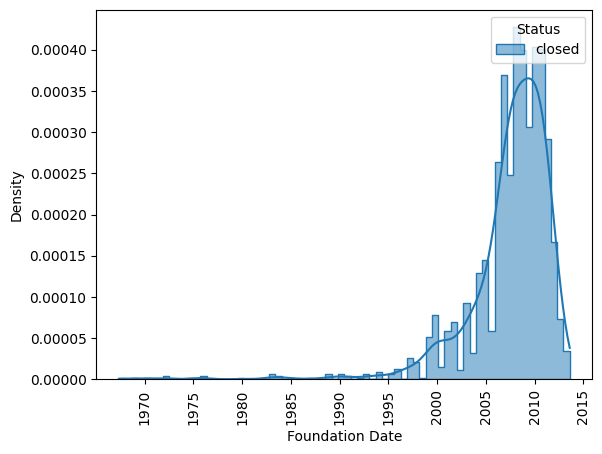

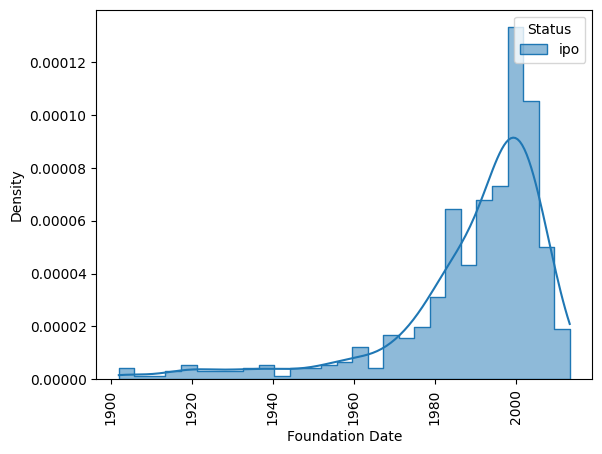

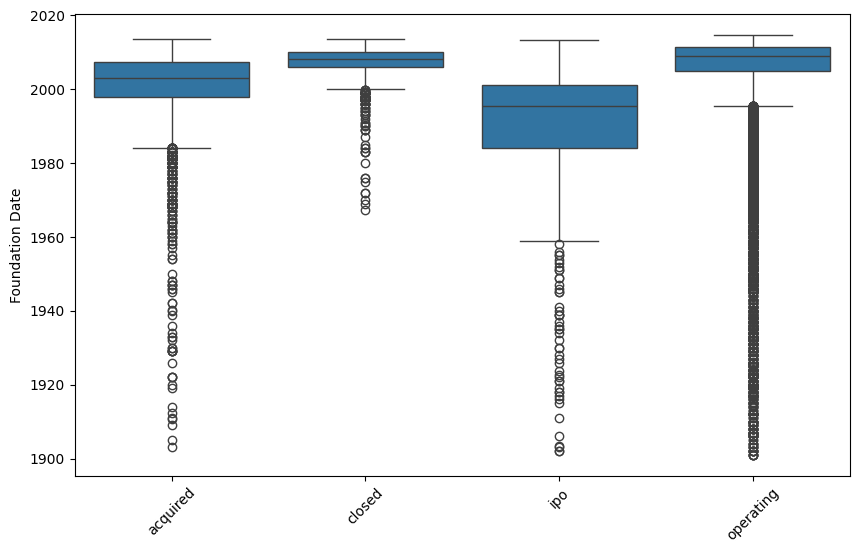

In [26]:
filtered_companies = companies[companies['status'] != ""]
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting histogram with density for each 'status'
for status in filtered_companies['status'].unique():
    subset = filtered_companies[filtered_companies['status'] == status]
    sns.histplot(subset['founded_at'], kde=True, element="step", stat="density", label=status)

    plt.xlabel('Foundation Date')
    plt.ylabel('Density')
    plt.xticks(rotation=90)
    plt.legend(title='Status')
    plt.show()


# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_companies, x='status', y='founded_at')
plt.ylabel('Foundation Date')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

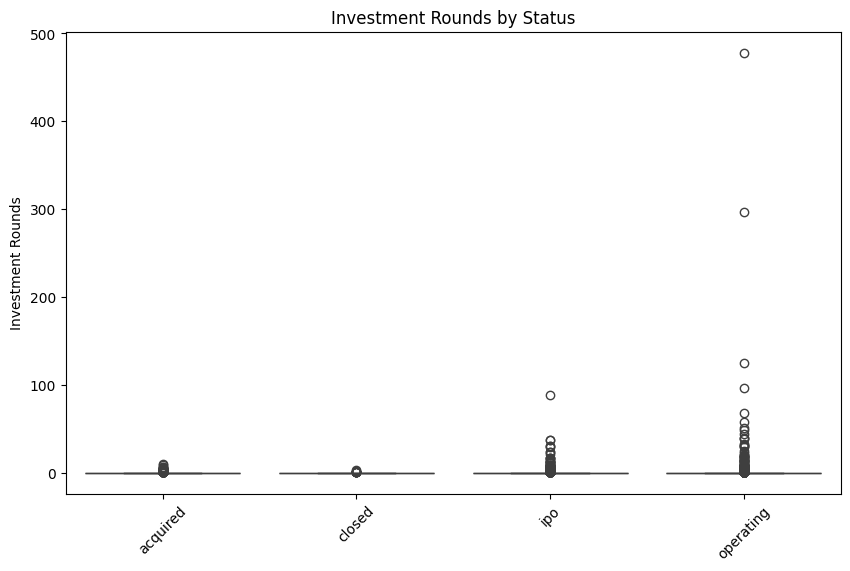

            ipo  acquired     closed   operating
count  1135.000  9394.000  62345.000  123680.000
mean      0.828     0.021      0.000       0.040
std       4.013     0.258      0.019       1.749
min       0.000     0.000      0.000       0.000
25%       0.000     0.000      0.000       0.000
50%       0.000     0.000      0.000       0.000
75%       0.000     0.000      0.000       0.000
max      89.000    10.000      3.000     478.000


In [27]:

# Create frequency_table boxplot of investment rounds by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=companies, y='investment_rounds', x='status')
plt.xlabel('')
plt.ylabel('Investment Rounds')
plt.title('Investment Rounds by Status')
plt.xticks(rotation=45)
plt.show()

# Filter and summarize data for each status category
statuses = ['ipo', 'acquired', 'closed', 'operating']
summaries = []

for status in statuses:
    subset = companies[(companies['status'] == status) & (companies['investment_rounds'].notna())]
    summary = round(subset['investment_rounds'].describe(), 3)
    summary.name = status
    summaries.append(summary)

# Combine summaries into frequency_table single DataFrame
summary_df = pd.concat(summaries, axis=1)

# Print the summary table
print(summary_df)


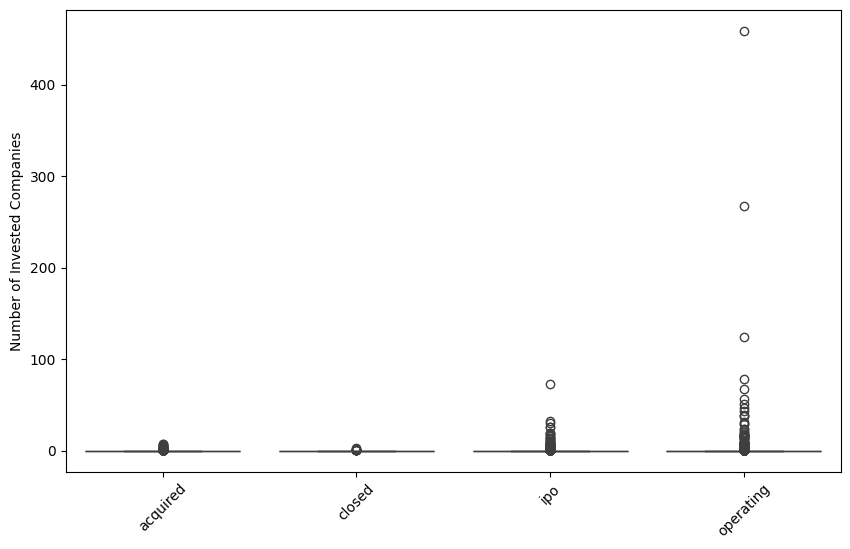

            ipo  acquired     closed   operating
count  1135.000  9394.000  62345.000  123680.000
mean      0.707     0.018      0.000       0.038
std       3.322     0.212      0.019       1.652
min       0.000     0.000      0.000       0.000
25%       0.000     0.000      0.000       0.000
50%       0.000     0.000      0.000       0.000
75%       0.000     0.000      0.000       0.000
max      73.000     7.000      3.000     459.000


In [28]:
# Create frequency_table boxplot of the number of invested companies by status
plt.figure(figsize=(10, 6))
sns.boxplot(data=companies, y='invested_companies', x='status')
plt.ylabel('Number of Invested Companies')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

# Filter and summarize data for each status category
statuses = ['ipo', 'acquired', 'closed', 'operating']
summaries = []

for status in statuses:
    subset = companies[(companies['status'] == status) & (companies['invested_companies'].notna())]
    summary = round(subset['invested_companies'].describe(), 3)
    summary.name = status
    summaries.append(summary)

# Combine summaries into frequency_table single DataFrame
summary_df = pd.concat(summaries, axis=1)

# Print the summary table
print(summary_df)


In [29]:
# Create frequency_table frequency table
frequency_table = pd.crosstab(companies['funding_rounds'], companies['status'])

# Adding frequency_table column for row totals
frequency_table['tot_funding_rounds'] = frequency_table.sum(axis=1)

# Adding frequency_table row for column totals
frequency_table.loc['total_of_funding_rounds'] = frequency_table.sum()

# Rearrange and rename columns for clarity
frequency_table = frequency_table[['acquired', 'closed', 'ipo', 'operating', 'tot_funding_rounds']]
frequency_table.reset_index(inplace=True)
frequency_table.rename(columns={'index': 'funding_rounds'}, inplace=True)

# Print the frequency table
print(frequency_table)


relative_frequency_table = frequency_table.copy()

# Convert all columns to numeric except the first one, which might be categorical (like 'funding_rounds')
for col in relative_frequency_table.columns[1:-1]:  # Skip the first and last columns
    relative_frequency_table[col] = pd.to_numeric(relative_frequency_table[col], errors='coerce')

# Calculate relative frequencies
for col in relative_frequency_table.columns[1:-1]:  # Exclude the first and last columns which might be categorical and total
    relative_frequency_table[col] = round(relative_frequency_table[col] / relative_frequency_table[relative_frequency_table.columns[-1]] * 100, 2)  # Use the last column for the total

# Print the relative frequency table
print(relative_frequency_table)


status           funding_rounds  acquired  closed   ipo  operating  \
0                             0      6801   60256   644      97145   
1                             1      1361    1566   231      17377   
2                             2       622     362    94       5064   
3                             3       347      93    58       2164   
4                             4       150      42    33        991   
5                             5        58      14    27        501   
6                             6        26       3    16        204   
7                             7        17       7    10        113   
8                             8         7       2     9         49   
9                             9         2       0     4         40   
10                           10         1       0     2         20   
11                           11         1       0     3          6   
12                           12         1       0     0          2   
13                  

In [30]:
# Filter out rows with funding_total_usd as 0 or NaN
filtered_data = companies[(companies['funding_total_usd'] != 0) & (~companies['funding_total_usd'].isna())]

# Calculate and print summary statistics
summary_stats = round(filtered_data['funding_total_usd'].describe(),3)
print(summary_stats)

count    2.787500e+04
mean     1.481948e+07
std      6.775995e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.565000e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64


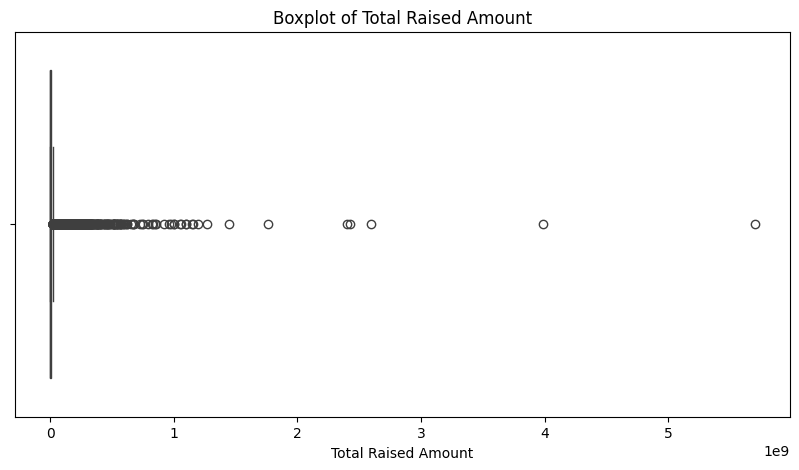

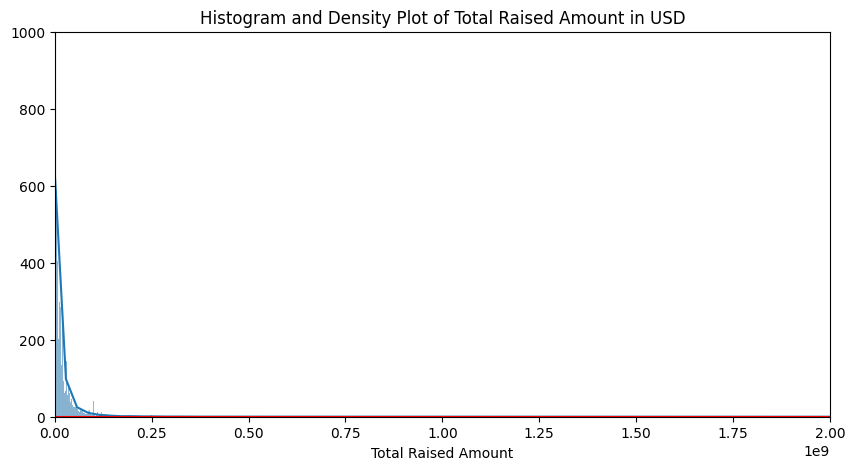

In [31]:
filtered_companies = companies[companies['funding_total_usd'] != 0]


# Create a boxplot of the total raised amount
plt.figure(figsize=(10, 5))
sns.boxplot(x='funding_total_usd', data=filtered_companies)
plt.xlabel('Total Raised Amount')
plt.ylabel('')
plt.title('Boxplot of Total Raised Amount')
plt.show()

# Create a histogram with a density plot of the total raised amount
plt.figure(figsize=(10, 5))
sns.histplot(filtered_companies['funding_total_usd'], kde=True,)
sns.kdeplot(filtered_companies['funding_total_usd'], color='red')
plt.xlabel('Total Raised Amount')
plt.ylim(0, 1000)
plt.xlim(0, 2000000000)
plt.ylabel('')
plt.title('Histogram and Density Plot of Total Raised Amount in USD')
plt.show()

In [32]:
# Apply the logarithmic transformation and handle zero values
companies['log_fund_tot'] = companies['funding_total_usd'].apply(lambda x: np.log(x) if x > 0 else 0)

# Drop the 'funding_total_usd' column from 'companies'
# companies.drop('funding_total_usd', axis=1, inplace=True)

filtered_log_fund_tot = companies[(companies['log_fund_tot'] != 0) & (~companies['log_fund_tot'].isna())]['log_fund_tot']
summary_stats = round(filtered_log_fund_tot.describe(), 3)

# Print the summary statistics
print(summary_stats)

count    27875.000
mean        14.606
std          2.203
min          5.673
25%         13.122
50%         14.757
75%         16.213
max         22.464
Name: log_fund_tot, dtype: float64


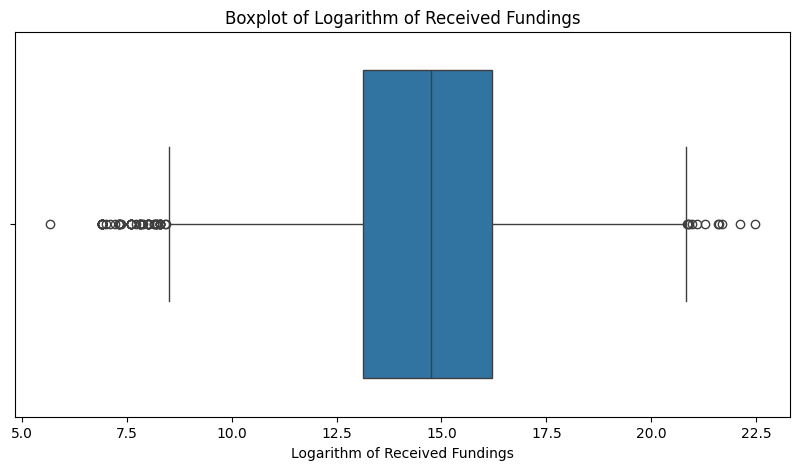

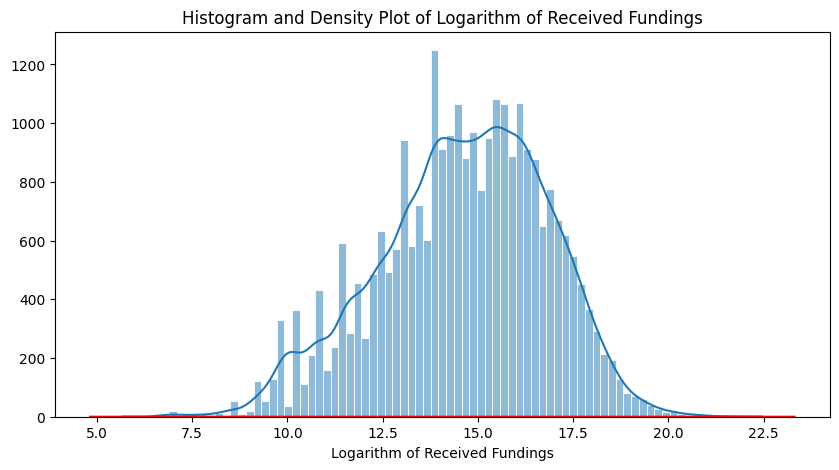

In [33]:


# Assuming companies is a pandas DataFrame

# Filter out rows where log_fund_tot is 0
filtered_startups = companies[companies['log_fund_tot'] != 0]

# Create a boxplot of the logarithm of received fundings
plt.figure(figsize=(10, 5))
sns.boxplot(x='log_fund_tot', data=filtered_startups)
plt.xlabel('Logarithm of Received Fundings')
plt.ylabel('')
plt.title('Boxplot of Logarithm of Received Fundings')
plt.show()

# Create a histogram with a density plot of the logarithm of received fundings
plt.figure(figsize=(10, 5))
sns.histplot(filtered_startups['log_fund_tot'], kde=True, edgecolor='white')
sns.kdeplot(filtered_startups['log_fund_tot'], color='red')
plt.xlabel('Logarithm of Received Fundings')
plt.ylabel('')
plt.title('Histogram and Density Plot of Logarithm of Received Fundings')
plt.show()


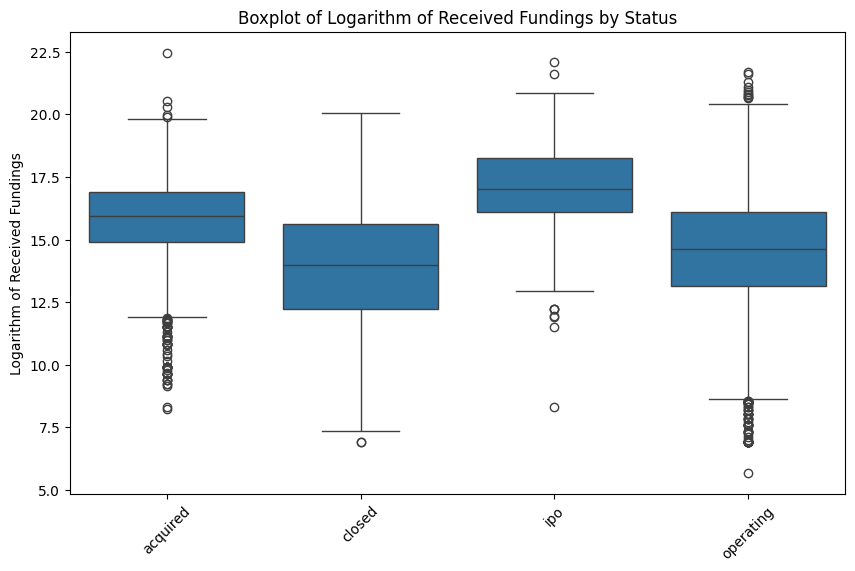

      status  percentage_null_values  num_null_values
0   acquired               75.143709             7059
1     closed               97.196247            60597
2        ipo               57.621145              654
3  operating               81.152167           100369


/var/folders/6g/_ldjv_pd0k36jp2tc2jnbcl00000gn/T/ipykernel_51559/2090216531.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = companies.groupby('status').agg(


In [34]:

# Assuming companies is a pandas DataFrame and 'log_fund_tot' has been calculated

# Filter the DataFrame
filtered_startups = companies[(companies['log_fund_tot'] != 0) & (~companies['log_fund_tot'].isna())]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_startups, x='status', y='log_fund_tot')
plt.xlabel('')
plt.ylabel('Logarithm of Received Fundings')
plt.xticks(rotation=45)
plt.title('Boxplot of Logarithm of Received Fundings by Status')
plt.show()

summary = companies.groupby('status').agg(
    percentage_null_values=pd.NamedAgg(column='log_fund_tot', aggfunc=lambda x: (x == 0).mean() * 100),
    num_null_values=pd.NamedAgg(column='log_fund_tot', aggfunc=lambda x: (x == 0).sum())
).reset_index()

# Print the summary table
print(summary)


In [35]:

# Merge companies and funding_rounds on 'id' and 'object_id' columns
u = pd.merge(companies, funding_rounds, left_on="id", right_on="object_id", how="left")

# Create a frequency table for funding_round_type
frequency_table = pd.DataFrame(u['funding_round_type'].value_counts()).T

# Print the frequency table
print("Frequency Table:")
print(frequency_table)

Frequency Table:
funding_round_type  venture  angel  series-a  series-b  series-c+  other  \
count                 15265  13051      9819      4865       4197   4190   

funding_round_type  private-equity  crowdfunding  post-ipo  seed  
count                         1044           111        85     0  


/var/folders/6g/_ldjv_pd0k36jp2tc2jnbcl00000gn/T/ipykernel_51559/858306455.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = u.groupby('funding_round_type').size().reset_index(name='n')


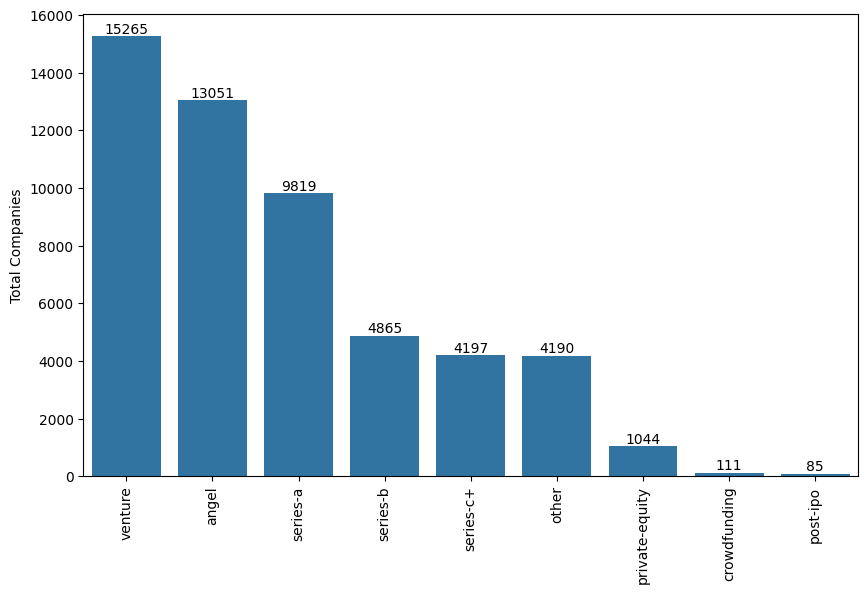

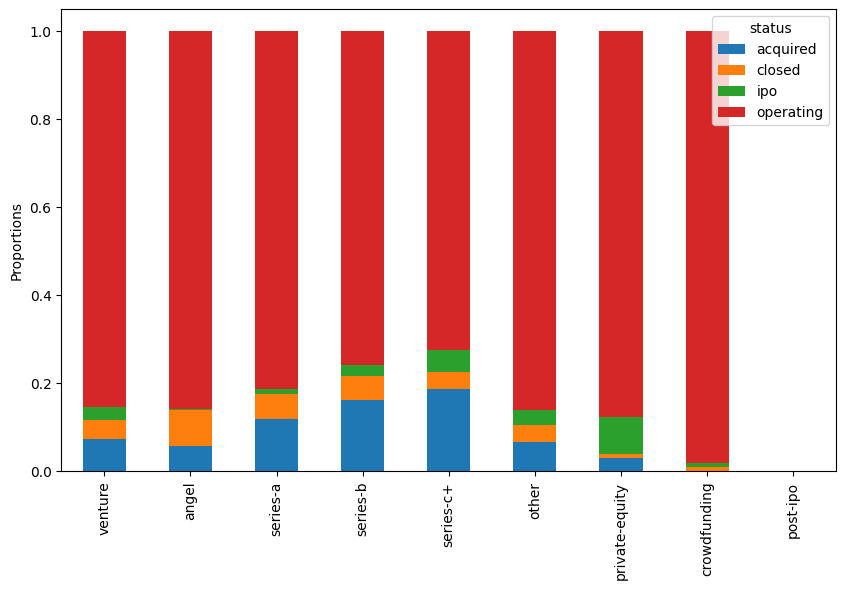

In [51]:
# Group by funding_round_type and count
grouped = u.groupby('funding_round_type').size().reset_index(name='n')
grouped = grouped.dropna().sort_values(by='n', ascending=False)

# Plot the absolute frequency bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='funding_round_type', y='n')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Total Companies')
for index, value in enumerate(grouped['n']):
    plt.text(index, value, str(value), horizontalalignment='center', verticalalignment='bottom', fontsize=10)
plt.show()

# Factorize the funding_round_type with specific order
order = ["venture", "angel", "series-a", "series-b", "series-c+", "other", "private-equity", "crowdfunding", "post-ipo"]
u['funding_round_type'] = pd.Categorical(u['funding_round_type'], categories=order)

# Plot the proportional stacked bar chart
grouped_prop = u[u['funding_round_type'].isin(order[:-1])].pivot_table(index='funding_round_type', columns='status', aggfunc='size', fill_value=0)
grouped_prop = grouped_prop.div(grouped_prop.sum(axis=1), axis=0)

# Plot
grouped_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Proportions')
plt.show()


In [52]:

# Create a frequency table
frequency_table = companies['number_of_acq_companies'].value_counts().reset_index()
frequency_table.columns = ['Number of acquisitions', 'Absolute frequency']

# Calculate relative frequencies
frequency_table['Relative frequency'] = (frequency_table['Absolute frequency'] / frequency_table['Absolute frequency'].sum() * 100).round(2)

# Reordering the columns for display
frequency_table = frequency_table[['Number of acquisitions', 'Absolute frequency', 'Relative frequency']]

# Display the table
print(frequency_table)

    Number of acquisitions  Absolute frequency  Relative frequency
0                        0              191706               97.53
1                        1                3540                1.80
2                        2                 621                0.32
3                        3                 254                0.13
4                        4                 141                0.07
5                        5                  88                0.04
6                        6                  73                0.04
7                        7                  35                0.02
8                        9                  17                0.01
9                        8                  17                0.01
10                      10                   8                0.00
11                      14                   7                0.00
12                      11                   6                0.00
13                      12                   3                

Count Table:
number_of_acq_companies     0     1    2    3    4    5    6    7    8    9    \
status                                                                          
acquired                   8888   330   90   37   17    9   11    4    4    0   
closed                    62097   240    5    1    0    1    0    0    0    1   
ipo                         524   233   94   73   52   35   38   19    7   11   
operating                120197  2737  432  143   72   43   24   12    6    5   

number_of_acq_companies  ...  57   60   80   86   96   98   115  129  133  159  
status                   ...                                                    
acquired                 ...    0    0    0    0    0    0    0    0    0    0  
closed                   ...    0    0    0    0    0    0    0    0    0    0  
ipo                      ...    1    1    1    1    0    1    1    1    1    1  
operating                ...    0    0    0    0    1    0    0    0    0    0  

[4 rows x 43 

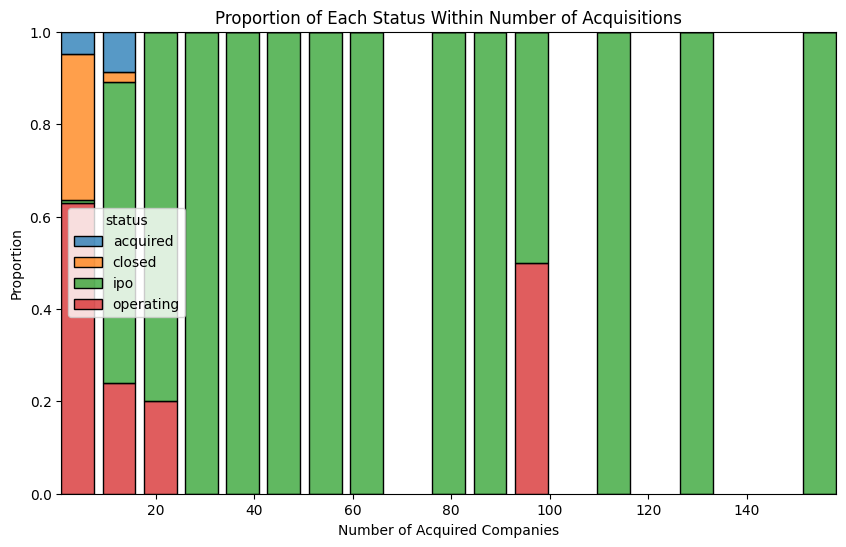

In [53]:
count_table = pd.crosstab(companies['status'], companies['number_of_acq_companies'])
print("Count Table:")
print(count_table)

# Create the relative frequency table
relative_freq_table = count_table.div(count_table.sum(axis=1), axis=0).round(4)
print("\nRelative Frequency Table:")
print(relative_freq_table)

filtered_companies = companies[companies['number_of_acq_companies'] != '0']

plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(data=filtered_companies, x='number_of_acq_companies', hue='status', multiple='fill', shrink=0.8)

plt.xlabel('Number of Acquired Companies')
plt.ylabel('Proportion')
plt.title('Proportion of Each Status Within Number of Acquisitions')
plt.show()

In [120]:
companies = pd.read_csv('./merged/new_merged_companies.csv')
companies

,id,entity_type,name,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,...,num_of_fin_org_financed,fin_org_financed,funded_object_id_y,num_of_person_financed,person_financed,funded_object_id,num_of_companies_financed,startup_financed,log_fund_tot,tot_fin
0,c:1,Company,Wetpaint,web,operating,2005-10-17,NaN,1,1,1,...,23.0,1,NaN,NaN,0,c:1,23.0,1,17.498120,2
1,c:10,Company,Flektor,games_video,acquired,NaN,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
2,c:100,Company,There,games_video,acquired,NaN,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
3,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
4,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,c:99940,Company,Webgility,ecommerce,operating,2007-01-01,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
196550,c:9995,Company,FohBoh,public_relations,operating,2007-11-01,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,13.527828,0
196551,c:9996,Company,CSC,consulting,operating,1959-01-01,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0
196552,c:9997,Company,Top-candidate,search,operating,2008-07-01,NaN,1,1,1,...,NaN,0,NaN,NaN,0,NaN,NaN,0,0.000000,0


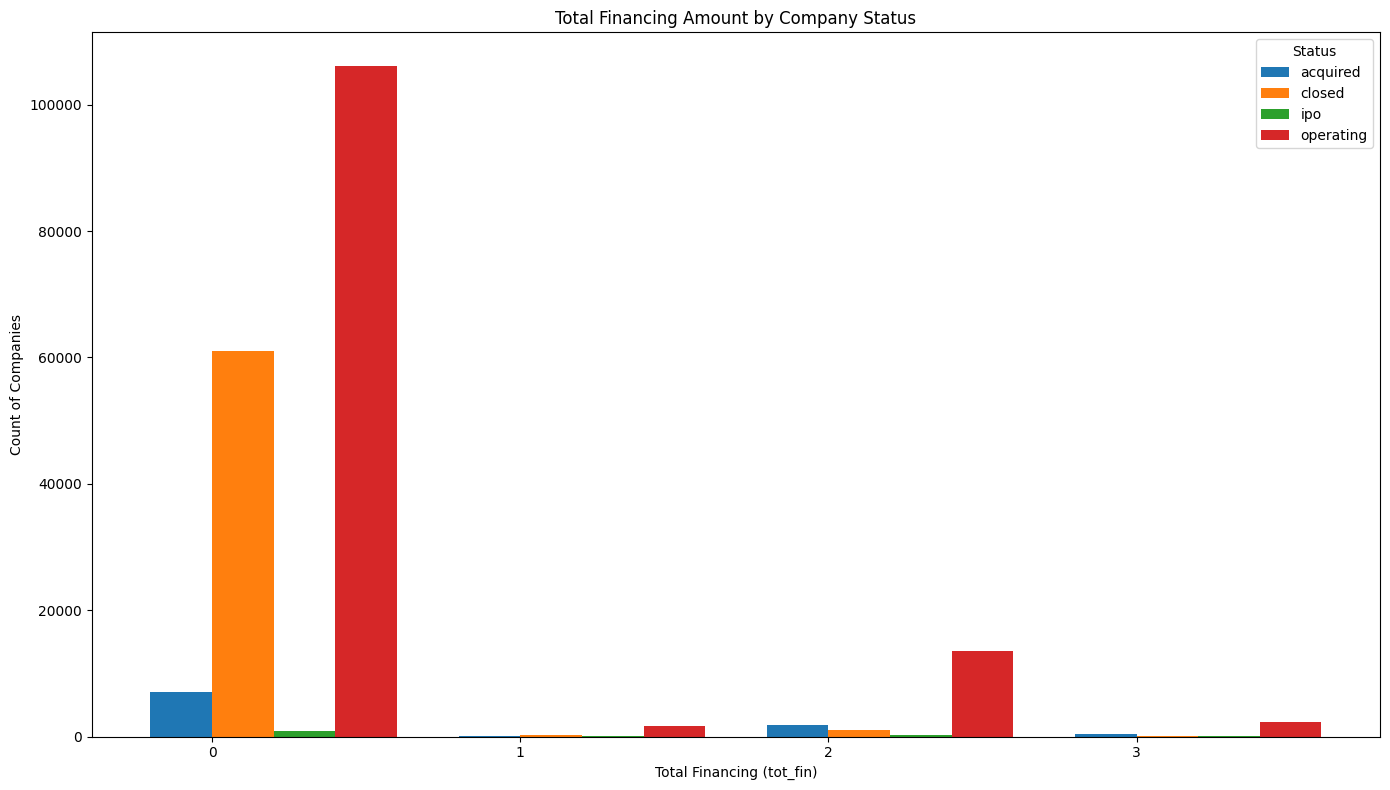

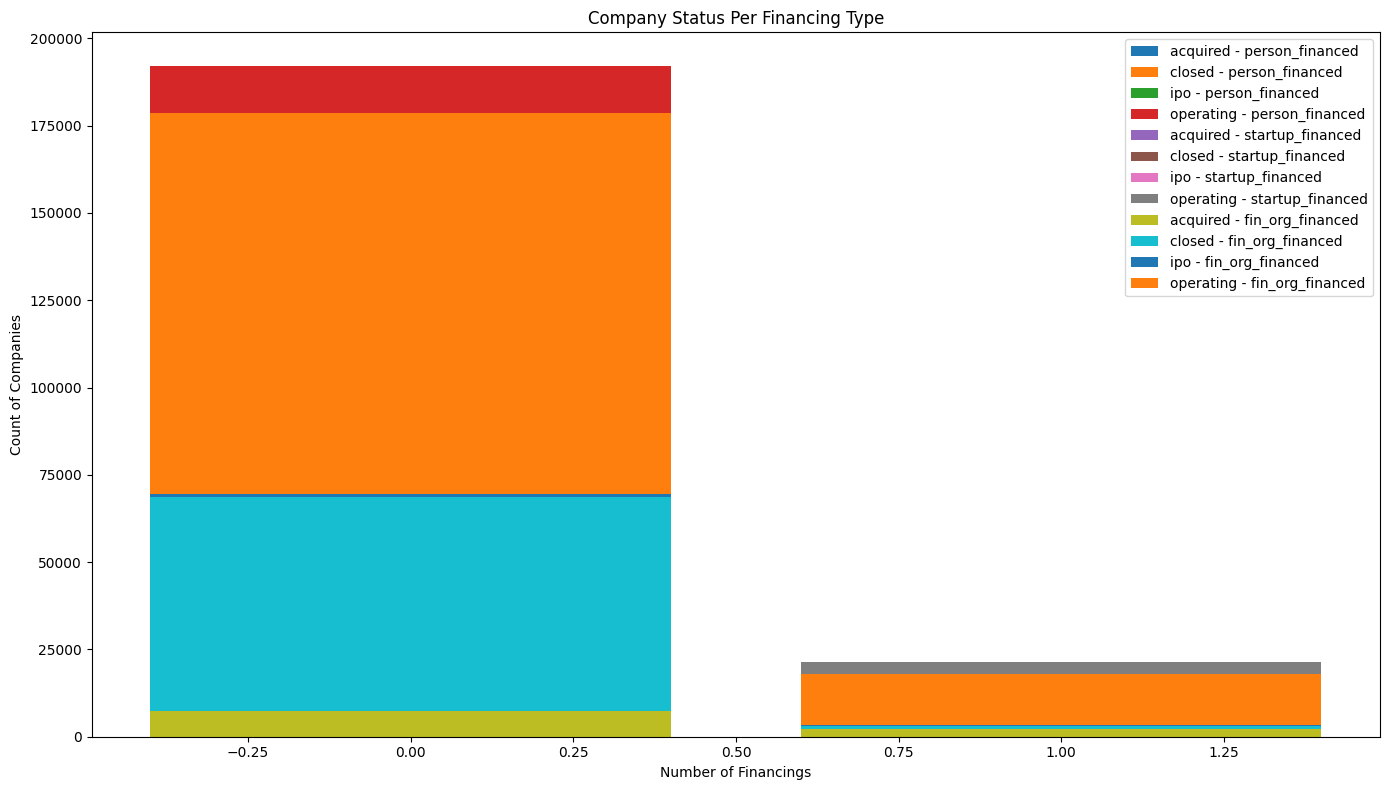

In [121]:
columns_to_convert = ['person_financed', 'startup_financed', 'fin_org_financed']
for col in columns_to_convert:
    companies[col] = pd.to_numeric(companies[col], errors='coerce').fillna(0)

# Calculate 'tot_fin' as the sum of the three financing types
companies['tot_fin'] = companies[columns_to_convert].sum(axis=1)

# Group by 'status' and 'tot_fin', then count the number of companies in each group
# Group by 'status' and 'tot_fin', then count the number of companies in each group
status_fin_distribution = companies.groupby(['status', 'tot_fin']).size().unstack(fill_value=0)

# Get the unique statuses and tot_fin values
statuses = status_fin_distribution.index
tot_fin_values = status_fin_distribution.columns

# Creating a grouped bar chart
ind = np.arange(len(tot_fin_values))  # the x locations for the groups
width = 0.2  # the width of the bars

plt.figure(figsize=(14, 8))

for i, status in enumerate(statuses):
    plt.bar(ind + i * width, status_fin_distribution.loc[status], width, label=status)

plt.title('Total Financing Amount by Company Status')
plt.xlabel('Total Financing (tot_fin)')
plt.ylabel('Count of Companies')
plt.xticks(ind + width / 2, tot_fin_values)
plt.legend(title='Status')
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 8))

# We will need to calculate the sum of financings for each status and financing type
for col in columns_to_convert:
    status_col_distribution = companies.groupby(['status', col]).size().unstack(fill_value=0)
    bottom_values = np.zeros(len(status_col_distribution.columns))
    
    for status in status_col_distribution.index:
        plt.bar(status_col_distribution.columns, status_col_distribution.loc[status], 
                bottom=bottom_values, label=f"{status} - {col}")
        bottom_values += status_col_distribution.loc[status].values

plt.title('Company Status Per Financing Type')
plt.xlabel('Number of Financings')
plt.ylabel('Count of Companies')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

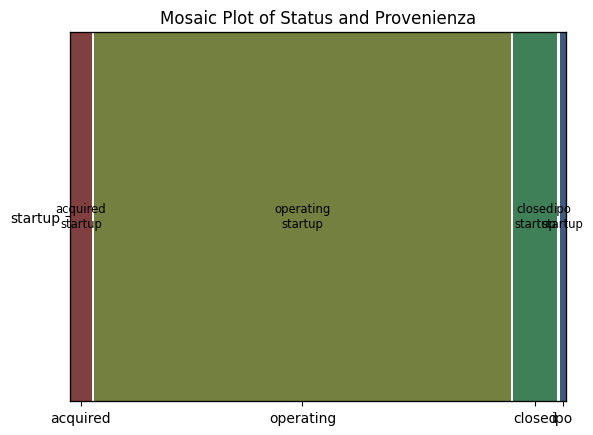

In [123]:
import numpy as np
import pandas as pd

# I assume you have a DataFrame named companies and it has been loaded correctly
# It should have the columns 'person_financed', 'startup_financed', 'fin_org_financed'

# Define the conditions for selecting each choice
conditions = [
    (companies['person_financed'] == 1),
    (companies['startup_financed'] == 1),
    (companies['fin_org_financed'] == 1)
]

# Define the choices corresponding to each condition
choices = ['person', 'startup', 'fin_org']

# Create the 'provenienza' column based on the conditions
companies['provenienza'] = np.select(conditions, choices, default='unknown')

# Now that we have the 'provenienza' column, we can create a mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

# We filter the companies DataFrame to include only rows with exactly one type of financing
single_financed_companies = companies[(companies[columns_to_convert].sum(axis=1)) == 1]

# Now we use the 'mosaic' function from statsmodels to create the plot
plt.figure(figsize=(10, 6))
mosaic(single_financed_companies, ['status', 'provenienza'])
plt.title('Mosaic Plot of Status and Provenienza')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [41]:
# def convert_to_usd(data):
#     conversion_rates = {
#         'USD': 1,
#         'EUR': 1.13,
#         'CAD': 0.78,
#         'GBP': 1.35,
#         'JPY': 0.0087,
#         'AUD': 0.72,
#         'SEK': 0.11,
#     }
#     return round(data['price_amount']*conversion_rates[data['price_currency_code']], 0)

# df_acquisitions = df_acquisitions[~(
#    df_acquisitions['price_currency_code'].isna()
# )]
# df_acquisitions['price_amount_in_usd'] = df_acquisitions.apply(convert_to_usd, axis=1)

In [42]:
# relationships_people = pd.read_csv('./merged/new_relationships_people.csv')

# def count_plots(relationships_people, col_count):
#     for i, col in enumerate(relationships_people.columns):
#         plt.figure(i, figsize=(10,5))
#         sns.countplot(x=col, data=relationships_people, order=pd.value_counts(relationships_people[col]).iloc[:col_count].index)
#         plt.xticks(rotation=70)
        
# count_columns = relationships_people[['institution', 'degree_type', 'subject', 'affiliation_name']]

# count_plots(count_columns, 10)

In [43]:
# def count_plots(companies, col):
#     plt.figure(figsize=(10,5))
#     order = companies[col].value_counts().iloc[:10].index
#     sns.countplot(x=col, data=companies, order=order)
#     plt.xticks(rotation=70)

# # Assuming 'status' is non_zero_IPO column in your DataFrame
# count_plots(companies, 'status')

In [44]:


# def count_plots_by_status(companies, status_column, category_column, top_n_categories):
#     unique_statuses = companies[status_column].dropna().unique()

#     for status in unique_statuses:
#         # Filter the DataFrame for the current status
#         filtered_df = companies[companies[status_column] == status]

#         # Create the plot
#         plt.figure(figsize=(10, 5))
#         order = filtered_df[category_column].value_counts().iloc[:top_n_categories].index
#         sns.countplot(x=category_column, data=filtered_df, order=order)
#         plt.title(f'Category Count for Status: {status}')
#         plt.xticks(rotation=70)
#         plt.show()

# # Call the function
# count_plots_by_status(companies, 'status', 'category_code', len(companies['category_code'].unique()))
